In [5]:
# section 1 load all the necessary modules and packages
import glob
import time
import geopandas as gpd
import netCDF4 as nc4
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import Polygon
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import warnings
import sys
import os
import platform
import shutil
import networkx as nx
import contextily as ctx
import matplotlib  as mpl
font = {'family' : 'Times New Roman',
            'weight' : 'bold',
            'size'   : 40}
mpl.rc('font', **font)


In [6]:
cat_slice = gpd.read_file('../data/shp/Victoria_cat.shp')
riv_slice = gpd.read_file('../data/shp/Victoria_riv.shp')
intersection = gpd.read_file('../data/shp/Victoria_int.shp')

/var/folders/yh/b1qy7zb96k980mcb2ps9n6d9t1c6zr/T/ipykernel_88167/3831815488.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ERROR 1: PROJ: internal_proj_create_from_database: Cannot find proj.db


CRSError: The WKT could not be parsed. OGR Error code 6

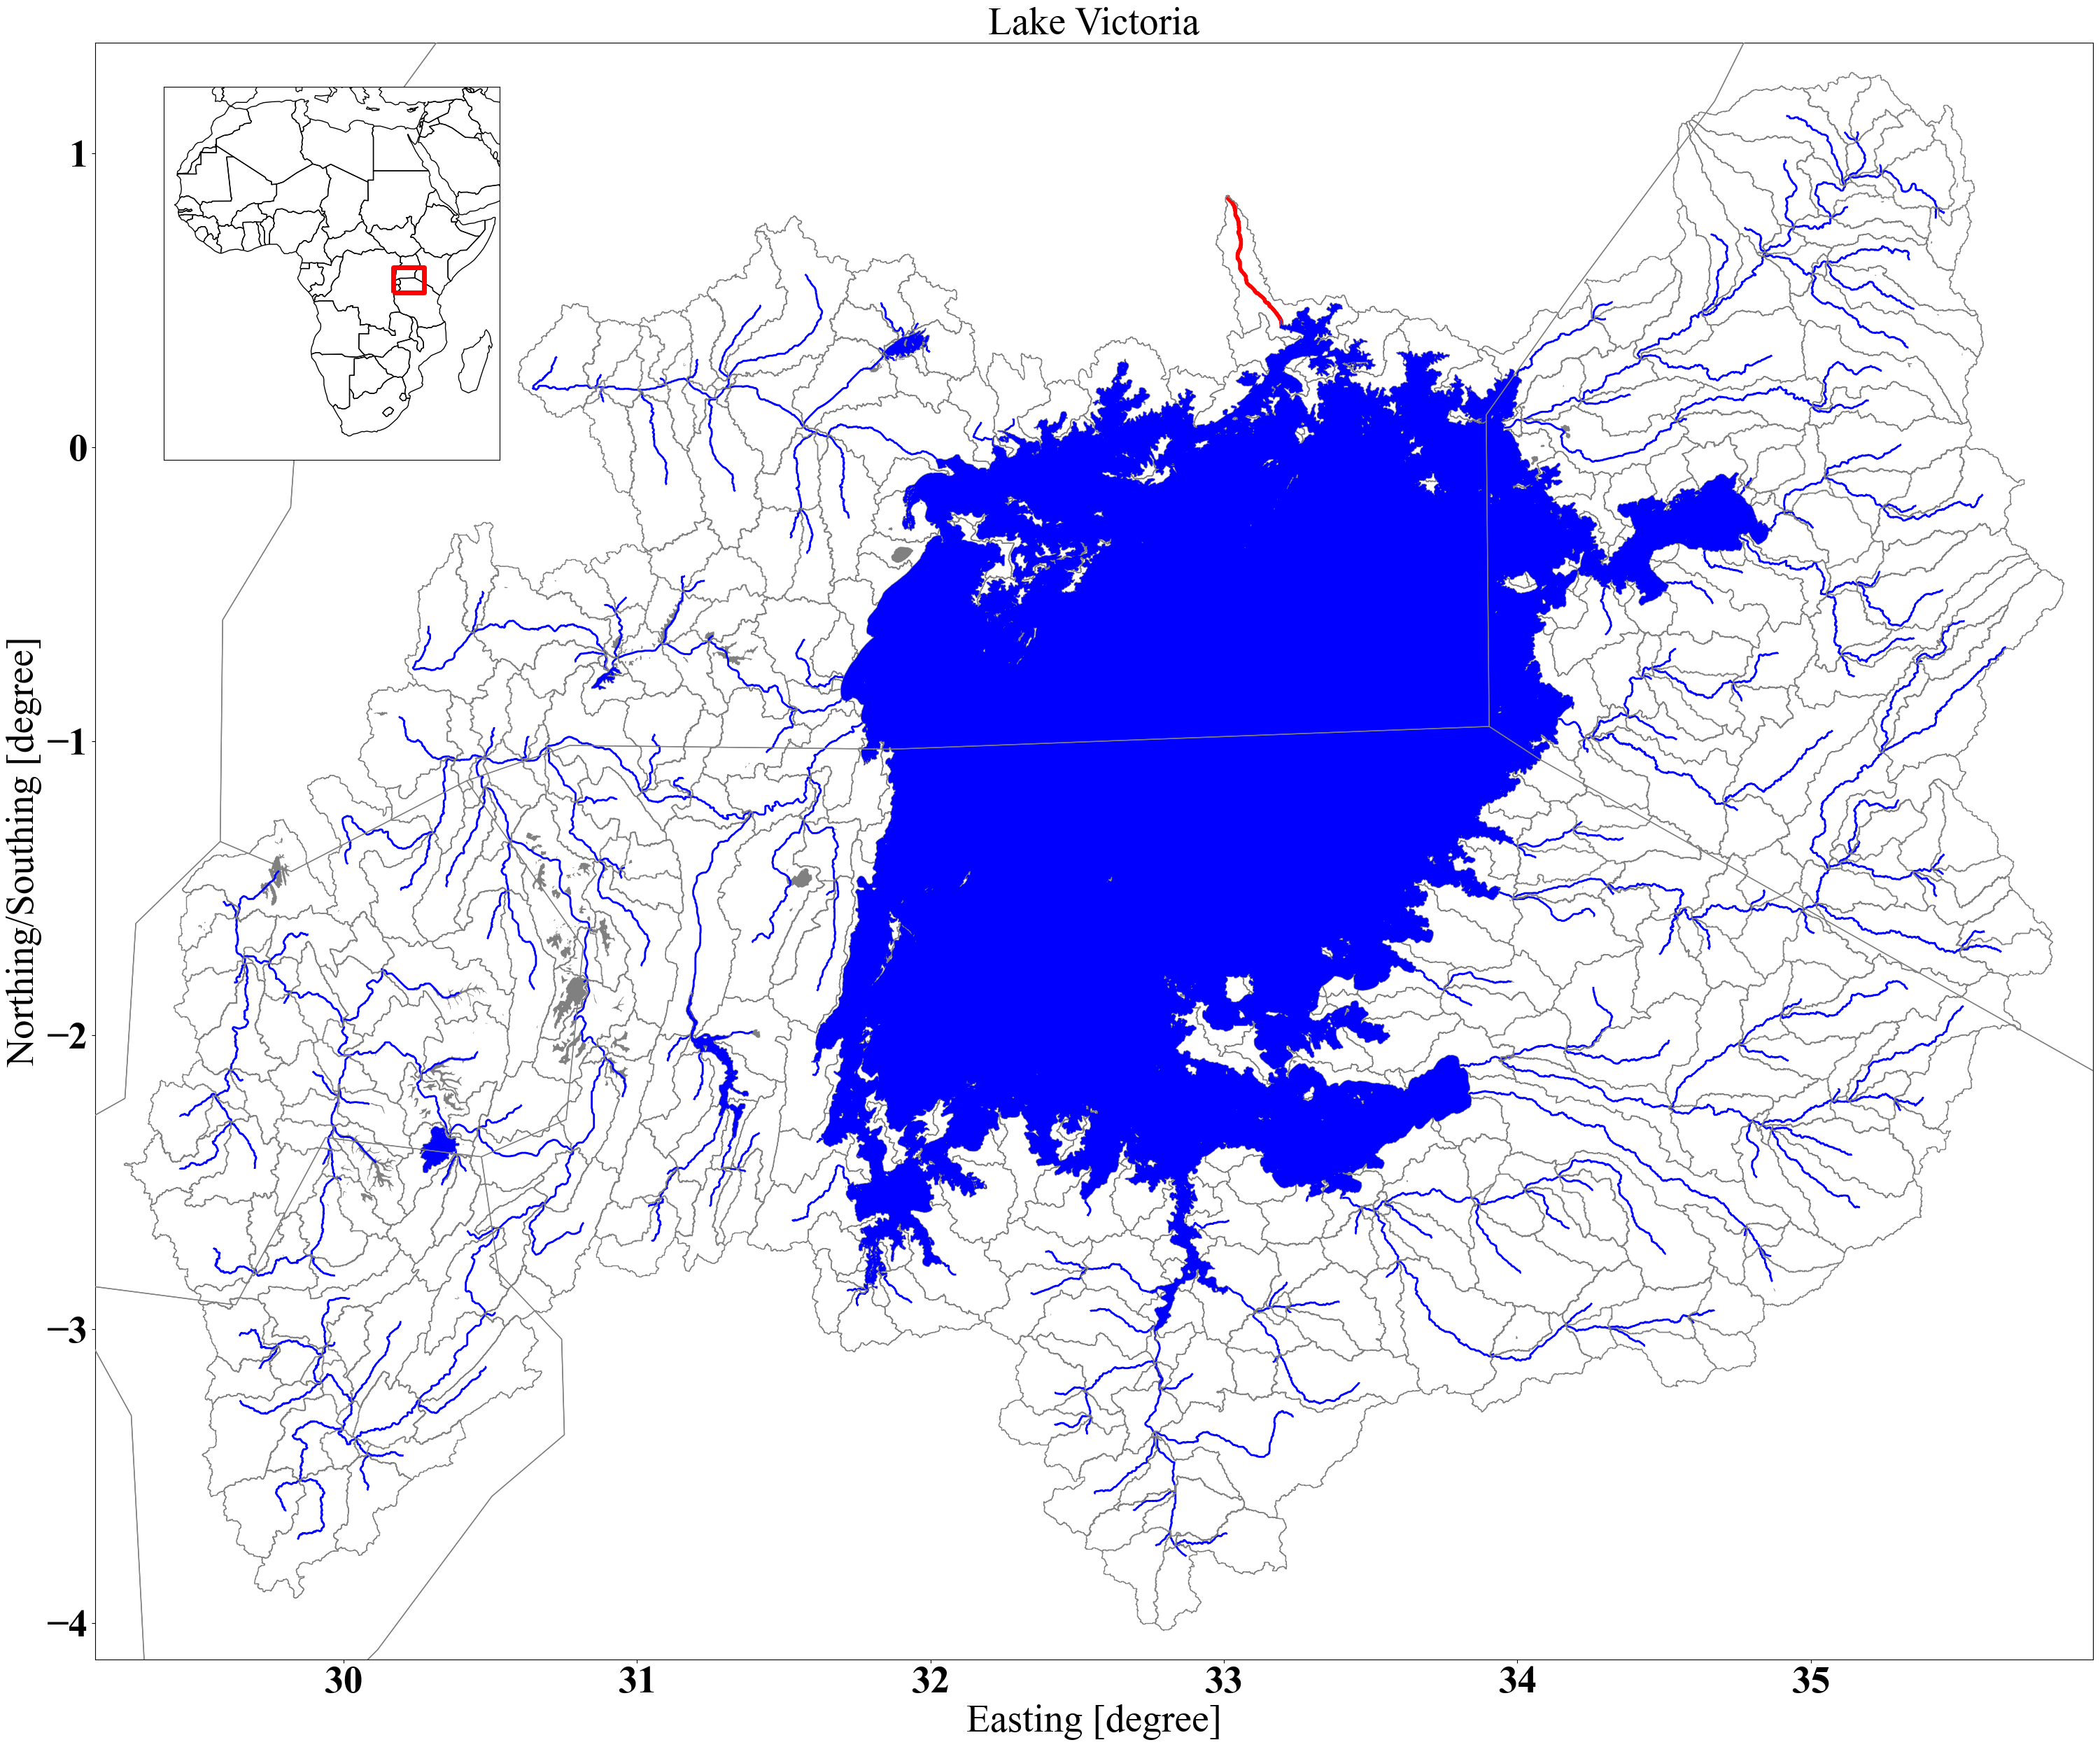

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs(epsg=4326)

#plotting
fig, ax = plt.subplots(figsize=(40,30))

ax.set_facecolor('white')
fig.patch.set_facecolor('white')

cat_slice.plot (ax=ax,
                zorder=10,
                facecolor='none',
                edgecolor='grey')

lake = cat_slice [cat_slice['lake']==1]
lake.plot (ax=ax,
           zorder=15,
           facecolor='blue')

riv_slice.plot(ax=ax,
              linewidth=2,
              color='blue')

# make outflow as red segment
riv_slice_outflow = riv_slice.copy()
riv_slice_outflow = riv_slice_outflow[riv_slice_outflow['seg_id']==2062605]
riv_slice_outflow.plot(ax=ax,
                       linewidth=4,
                       color = 'red')


intersection.plot(ax=ax, color='grey')

world.plot(ax=ax,
           zorder=20,
           facecolor='none',
           edgecolor='grey')

# add title and save
plt.title('Lake Victoria', fontsize = 40)
plt.xlabel('Easting [degree]', fontsize = 40) #xlable which is long
plt.ylabel('Northing/Southing [degree]', fontsize = 40) #ylable which is lat

#
xmin, ymin, xmax, ymax = cat_slice.total_bounds
ax.axes.set_xlim(xmin-0.1,xmax+0.1)
ax.axes.set_ylim(ymin-0.1,ymax+0.1)

#
ax2 =fig.add_axes([0.18,0.68,0.12,0.18])
ax2.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

# Plot the world countries
world.plot(ax=ax2, facecolor='none',
                    edgecolor='black')

ax2.axes.set_xlim(-20,52)
ax2.axes.set_ylim(-40,40)

#
rectangle = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])

# Create a GeoDataFrame with the rectangle polygon
rectangle = gpd.GeoDataFrame(geometry=[rectangle])

rectangle.plot(ax=ax2,facecolor='none',
               edgecolor='red', linewidth=5)

riv_slice = riv_slice.to_crs(epsg=4326)

ctx.add_basemap(ax,
                zoom=10,
                crs=cat_slice.crs,
                alpha = 0.4,
                source = ctx.providers.CartoDB.Positron)
                # source=ctx.providers.Stamen.TonerLite)

if not os.path.isdir('../fig/'):
    os.makedirs('../fig/')
    
plt.savefig('../fig/lake_victoria_map.png')
